# Infrared Group Frequencies QS4

## Experimental data
Start with importing the pandas, matplotlib and numpy libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('seaborn-whitegrid')

**Download and import the data files** using pandas [read_csv](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#csv-text-files):

In [2]:
exp1 = pd.read_csv("CH3OH.csv")
exp2 = pd.read_csv("CH3OD.csv")
exp3 = pd.read_csv("CD3OD.csv")

In [3]:
exp1

,wav,int
0,500.4372,0.028202
1,500.9193,0.031986
2,501.4014,0.035304
3,501.8835,0.037961
4,502.3657,0.039812
...,...,...
7255,3998.1950,0.007745
7256,3998.6770,0.007928
7257,3999.1590,0.008114
7258,3999.6410,0.008293


You can explore the data in tabular form using `head()` to see the first few rows of data (or `tail()` for the last rows):

In [4]:
exp2.tail(10) #The number in the brackets says how many rows to show

,wav,int
7250,3995.784,0.007989
7251,3996.266,0.008235
7252,3996.748,0.008510
7253,3997.230,0.008792
7254,3997.712,0.009057
7255,3998.195,0.009287
7256,3998.677,0.009468
7257,3999.159,0.009595
7258,3999.641,0.009672
7259,4000.123,0.009707


A strange convention in infrared spectroscopy is to plot the spectra backwards. Plot your three experimental spectra:

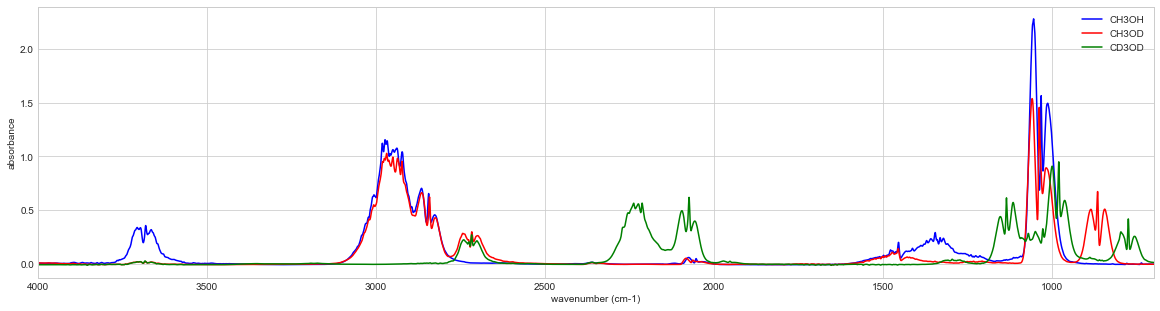

In [5]:
x1 = exp1['wav']
y1 = exp1['int']

x2 = exp2['wav']
y2 = exp2['int']

x3 = exp3['wav']
y3 = exp3['int']

plt.figure(figsize=[20,5])
plt.plot(x1,y1,"b-",label="CH3OH")
plt.plot(x2,y2,"r-",label="CH3OD")
plt.plot(x3,y3,"g-",label="CD3OD")

plt.xlabel('wavenumber (cm-1)')
plt.xlim(4000,700)
plt.ylabel('absorbance')
plt.legend()
plt.show()

In general, the highest frequency vibrations are stretches, followed by bends, followed by torsions.

## Computational exercise
To assign the rest of the spectra in detail you will perform quantum chemical calculations using [WebMO](https://www.webmo.net/demoserver/cgi-bin/webmo/login.cgi).

Once your job has completed, copy the output code below and run it, entering the password "guest":

In [6]:
# %load https://www.webmo.net:443/demoserver/cgi-bin/webmo/rest.cgi/templates/rest/_print_results?jobNumber=655747&username=guest
import requests
from getpass import getpass
import json

baseURL="https://www.webmo.net:443//demoserver/cgi-bin/webmo/rest.cgi"
username="guest"
jobNumber=655747

print("Enter WebMO password:")
password=getpass()
try:
    #obtain a REST token
    login={'username' : username, 'password' : password} #WebMO login information, used to retrieve a REST access token
    r = requests.post(baseURL + "/sessions", data=login)
    r.raise_for_status() #raise an exception if there is a problem with the request
    auth=r.json() #include both 'username' and 'token' parameters needed to authenticate further REST requests
    
    #obtain results from the specified job number
    r = requests.get(baseURL + "/jobs/%d/results" % jobNumber, params=auth)
    r.raise_for_status() #raise an exception if there is a problem with the request
    results=r.json()
    
    #read out the optimized geometry
    geometry=results["geometry"]
    symbols=results["symbols"]
    properties=results["properties"]
    
    #output the calculated properties
    print(json.dumps(properties, indent=4))
        
    #End the REST session
    r = requests.delete(baseURL + "/sessions", params=auth)
    r.raise_for_status() #raise an exception if there is a problem with the request

    
#
#Catch any HTTP / REST exceptions and log the underlying cause
#
except requests.exceptions.HTTPError:
    if (r.ok):
        print("Error during REST request: %s" % r.json()["error"])
    else:
        print("HTTP error: %s" % r.reason)



Enter WebMO password:
········
{
    "zpe": {
        "value": 0.054487,
        "units": "Hartree"
    },
    "entropy": {
        "value": 56.641,
        "units": "cal/mol-K"
    },
    "rhf_energy": {
        "value": -114.398019421,
        "units": "Hartree"
    },
    "scf_dipole_moment": [
        -1.6758,
        -1.3009,
        0
    ],
    "internal_energy": {
        "value": -114.340277,
        "units": "Hartree"
    },
    "cpu_time": {
        "value": 7.4,
        "units": "sec"
    },
    "quote": " ASKING DUMB QUESTIONS IS EASIER THAN CORECTING DUMB MISTAKES.",
    "geometry_sequence_energies": [
        -114.389586443,
        -114.397367083,
        -114.397940764,
        -114.398017181,
        -114.398019421,
        -114.398019421,
        -114.398019421
    ],
    "stoichiometry": "CH<sub>4</sub>O",
    "basis": "3-21G",
    "free_energy": {
        "value": -114.366245,
        "units": "Hartree"
    },
    "rotational_constants": [
        130.63381,
      

Take the output we are interested in and make a table using pandas:

In [7]:
methanol = pd.DataFrame()
methanol["Wavenumber (cm$^{-1}$)"] = properties["vibrations"]["frequencies"]
methanol["Intensity (km/mol)"] = properties["vibrations"]["intensities"]["IR"]
methanol

,Wavenumber (cm$^{-1}$),Intensity (km/mol)
0,359.7859,172.9181
1,1090.3387,99.1096
2,1152.5920,19.1681
3,1253.7825,0.9175
4,1480.2061,30.4452
5,1637.6362,4.9613
6,1685.5798,3.1553
7,1698.1376,3.3463
8,3178.7308,40.9647
9,3217.8728,85.2104


Add a description column to this table:

In [8]:
description = pd.Series(dtype=str, index=range(0,12)) #Creates a pandas Series (column) of the right length
description[0] = "C-O torsion"                        #Add first description

Add your descriptions by writing into the box when prompted below. Rerun for a new row (updating the row number appropriately):

In [9]:
description[1] = input("Description: ") #Change the position in description for new row
#Hit Enter when ready

Description: test


In [10]:
#Show the list so far:
description

0     C-O torsion
1            test
2             NaN
3             NaN
4             NaN
5             NaN
6             NaN
7             NaN
8             NaN
9             NaN
10            NaN
11            NaN
dtype: object

When the column is ready add it to the table:

In [29]:
methanol["Description"] = description
methanol.style.set_caption("Table 1. Tables Have Titles That Go Here")

,Wavenumber (cm$^{-1}$),Intensity (km/mol),Description
0,359.785900,172.918100,C-O torsion
1,1090.338700,99.109600,test
2,1152.592000,19.168100,nan
3,1253.782500,0.917500,nan
4,1480.206100,30.445200,nan
5,1637.636200,4.961300,nan
6,1685.579800,3.155300,nan
7,1698.137600,3.346300,nan
8,3178.730800,40.964700,nan
9,3217.872800,85.210400,nan


In [30]:
methanol.to_clipboard() #Table has now been copied - paste into Moodle?

### Calculated spectrum

In [13]:
calc1 = pd.read_csv("spectrumKL.jdx", 
                        delimiter=' ',
                        names=['wav', 'int'],    #name the columns
                        skiprows=17,      #ignore metadata at top of file
                        skipfooter=1,     #ignore the last line of data
                        engine='python')  #for skipfooter

In [14]:
calc1

,wav,int
0,309.785900,0.0
1,311.590191,0.0
2,313.394482,0.0
3,315.198773,0.0
4,317.003063,0.0
...,...,...
1995,3909.346146,0.0
1996,3911.150437,0.0
1997,3912.954727,0.0
1998,3914.759018,0.0


In [27]:
#OD to OH str freq ratio:
ratio = 2816.4827/3868.3672
print(ratio)

0.7280804934960673


Import the other calculated spectra from WebMO for CH$_3$OD and CD$_3$OD:

In [16]:
calc2 = pd.read_csv("spectrum2.jdx", 
                        delimiter=' ',
                        names=['wav', 'int'],    #name the columns
                        skiprows=17,      #ignore metadata at top of file
                        skipfooter=1,     #ignore the last line of data
                        engine='python')  #for skipfooter

calc3 = pd.read_csv("spectrum3.jdx", 
                        delimiter=' ',
                        names=['wav', 'int'],    #name the columns
                        skiprows=17,      #ignore metadata at top of file
                        skipfooter=1,     #ignore the last line of data
                        engine='python')  #for skipfooter

In [17]:
x4 = calc1['wav']
y4 = calc1['int']

x5 = calc2['wav']
y5 = calc2['int']

x6 = calc3['wav']
y6 = calc3['int']

## Results
Plot the theoretical spectrum and compare it to the experimental spectrum. Since they have different ranges for the y-axis, we can perform a scaling on the theoretical spectrum within the plotting code (isn’t that great?). You will notice that the calculated bands are much narrower and to higher energy than the experimental bands.

---
### $CH_3OH$
First plot is good to show overall spectrum and get scaling correct:

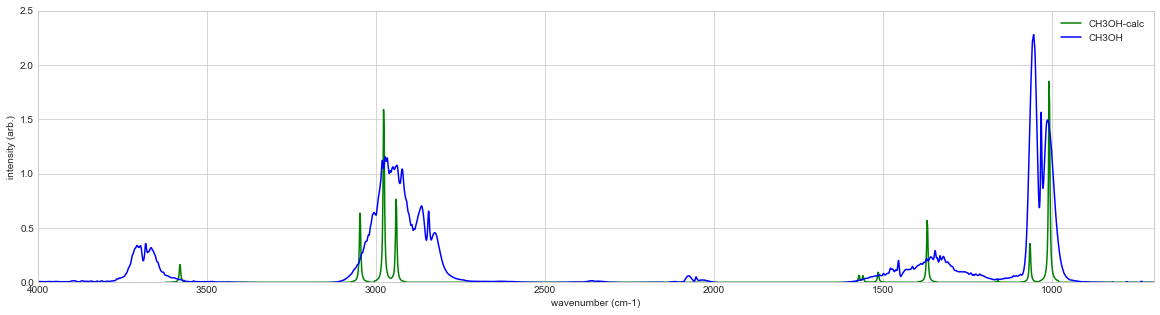

In [18]:
plt.figure(figsize=[20,5])

plt.plot(0.925*x4,y4/200,"g-",label="CH3OH-calc") #change the x4 scaling factor here
plt.plot(x1,y1,"b-",label="CH3OH")

plt.xlabel('wavenumber (cm-1)')
plt.xlim(4000,700)
plt.ylim(0,2.5)
plt.ylabel('intensity (arb.)')
plt.legend()
plt.show()

Next we can pick the peaks over a certain wavelength range:

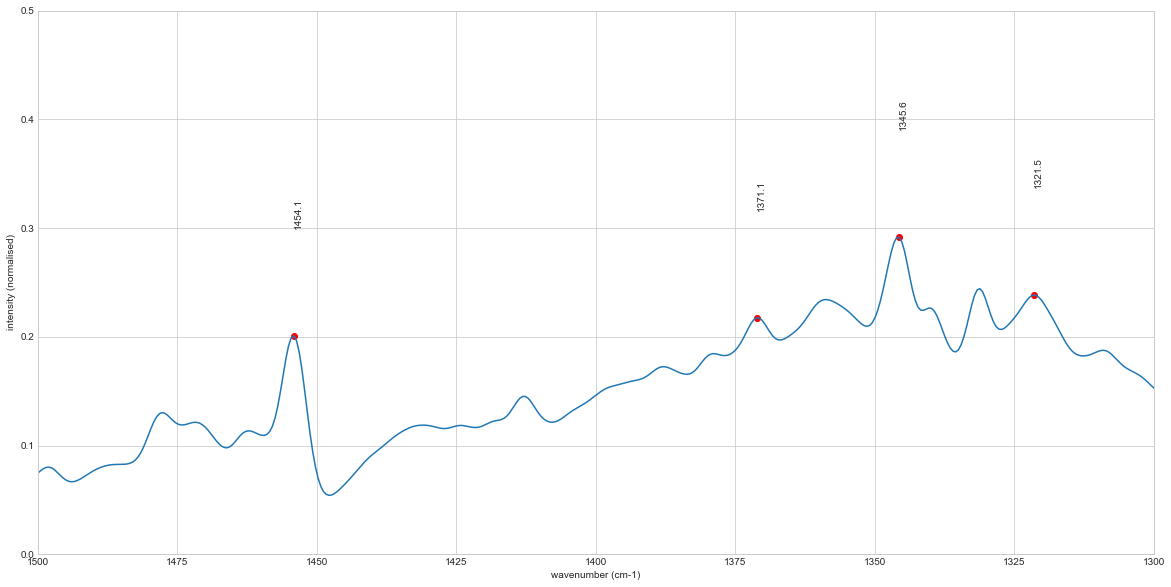

In [46]:
import scipy.signal as sig

# Modify threshold, distance, width and height to change the peak picking criteria:
peaks = sig.find_peaks(y1, threshold=None, distance=40, width=None, height=0.15) 

# Choose range depending on which band you are assigning
xmin = 1300 
xmax = 1500

plt.figure(figsize=[20,10])
plt.plot(x1[peaks[0]],y1[peaks[0]],"ro")
plt.plot(x1,y1)
plt.xlabel('wavenumber (cm-1)')
plt.xlim(xmax,xmin)
plt.ylim(0,0.5)
plt.ylabel('intensity (normalised)')

for i in range(len(peaks[0])):
    if x1[peaks[0][i]] > xmin and x1[peaks[0][i]] < xmax:
        stri = '%s' % float('%.5g' % x1[peaks[0][i]])
        plt.text(x1[peaks[0][i]],y1[peaks[0][i]]+0.1,stri,rotation=90)

plt.show()

### Methanol group frequencies:
Assign the vibrational frequencies for the methanol spectrum by creating a table below. Five bands are expected but only four regions of strong to medium absorption are easily recognised. A careful comparison of the CH$_3$OH and CH$_3$OD spectra shows that the absorption of CH$_3$OH in the 1300 – 1500 cm$^{–1}$ region consist of two overlapping bands, each of irregular shape.  Read off the centre frequency of all bands of well-defined shape and of the sharp features in the 1300 – 1500 cm$^{–1}$ region and list them in order of decreasing frequency. 

- C-O str overtone is 2052.9 cm-1

In [68]:
frequencies = [3680, 2843.5, 1454.1, 1345.6, 1032.2]
descriptions = ['OH str', 'CH str (s)', 'HCH bend', 'COH bend', 'CO str']
ch3oh_table = pd.DataFrame()
ch3oh_table['Frequency /cm-1'] = frequencies
ch3oh_table["Description"] = descriptions
ch3oh_table
#ch3oh_table.style.set_caption("CH3OH Vibrational Frequencies")

,Frequency /cm-1,Description
0,3680.0,OH str
1,2843.5,CH str (s)
2,1454.1,HCH bend
3,1345.6,COH bend
4,1032.2,CO str


Based on the O-H to O-D ratio you worked out before, what is the predicted wavelength for the O-D stretch?

In [26]:
0.73*3680.0

2686.4

Repeat the above steps for the deuterated derivatives and assign their vibrational frequencies.

### $CH_3OD$
On replacing the O–H group with O–D we expect the O–H stretch band and the C–O–H bend band to shift to lower frequencies by a factor of ~1.4, while all other bands remain virtually unshifted. Carefully compare the CH$_3$OH and CH$_3$OD spectra and identify the two bands of the CH$_3$OH spectrum which do not appear (or appear only weakly – the CH$_3$OD sample may not be pure) in the CH$_3$OD spectrum.  These two bands must be *OH str* and *COH bend*. Furthermore, given that stretching vibrations occur at higher frequencies than bending vibrations, i.e. *OH str > COH bend*, it is now possible to assign these for CH$_3$OH. The CH$_3$OD spectrum must similarly have two bands which do not appear in the CH$_3$OH spectrum; these must be *OD str* and *COD bend* for the CH$_3$OD molecule. Measure all the absorption bands and list them in order of increasing frequency:

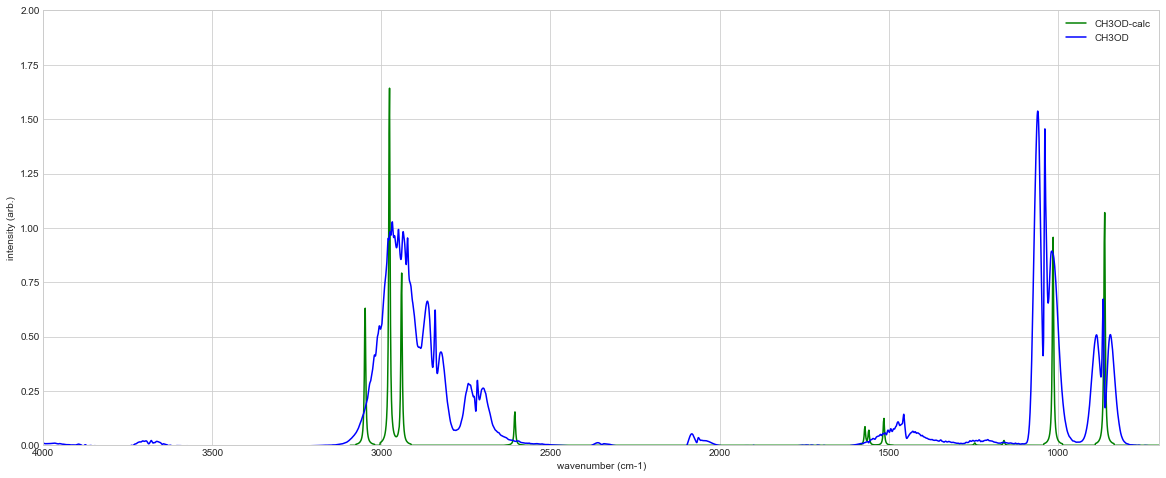

In [50]:
plt.figure(figsize=[20,8])

plt.plot(0.925*x5,y5/200,"g-",label="CH3OD-calc") 
plt.plot(x2,y2,"b-",label="CH3OD")

plt.xlabel('wavenumber (cm-1)')
plt.xlim(4000,700)
plt.ylim(0,2)
plt.ylabel('intensity (arb.)')
plt.legend()
plt.show()

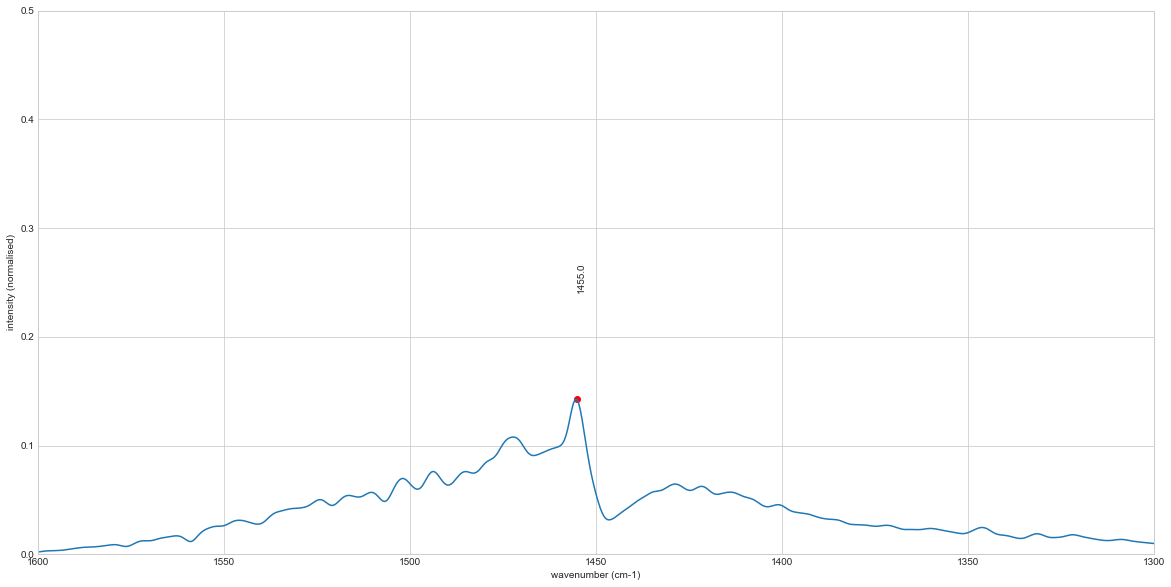

In [56]:
import scipy.signal as sig

peaks = sig.find_peaks(y2, threshold=None, distance=40, width=None, height=0.1)

xmin = 1300
xmax = 1600

plt.figure(figsize=[20,10])
plt.plot(x2[peaks[0]],y2[peaks[0]],"ro")
plt.plot(x2,y2)
plt.xlabel('wavenumber (cm-1)')
plt.xlim(xmax,xmin)
plt.ylim(0,0.5) 
plt.ylabel('intensity (normalised)')

for i in range(len(peaks[0])):
    if x2[peaks[0][i]] > xmin and x2[peaks[0][i]] < xmax:
        stri = '%s' % float('%.5g' % x2[peaks[0][i]])
        plt.text(x2[peaks[0][i]],y2[peaks[0][i]]+0.1,stri,rotation=90)

plt.show()

In [69]:
frequencies = [2967.4, 2841.1, 2716.2, 1455, 1038, 865.4]
descriptions = ['CH str (a)', 'CH str (s)', 'OD str', 'HCH bend', 'CO str', 'COD bend']
ch3od_table = pd.DataFrame()
ch3od_table['Frequency /cm-1'] = frequencies
ch3od_table["Description"] = descriptions
ch3od_table

,Frequency /cm-1,Description
0,2967.4,CH str (a)
1,2841.1,CH str (s)
2,2716.2,OD str
3,1455.0,HCH bend
4,1038.0,CO str
5,865.4,COD bend


### $CD_3OD$
Arguments similar to those above show that a comparison of the CH$_3$OD and CD$_3$OD spectra should enable an identification of the C–H stretch and H–C–H bend bands. The CD$_3$OD sample is difficult to obtain with 100% purity and the following peaks in the spectrum should be ignored:
- 3700 cm$^{–1}$ (weak) and 1280 cm$^{–1}$ (medium), due to CD$_3$OH;
- 1070 cm$^{–1}$ (medium) and 1050 cm$^{–1}$ (medium), due to CD$_2$HOD;
- 1020 cm$^{–1}$ (medium), due to CD$_2$HOD.

Before you start assigning peaks in the CD$_3$OD spectrum, mark the above peaks so you can ignore them in your subsequent analysis. 

List the frequencies of the remaining bands and use deuterium frequency shifts to identify *CH str* and *HCH bend*.  The assignment of these can be checked by going back to the CH$_3$OH spectrum:  they should not change (much) in frequency on going from CH$_3$OH to CH$_3$OD.  The remaining band can now be assigned to the *CO str*.

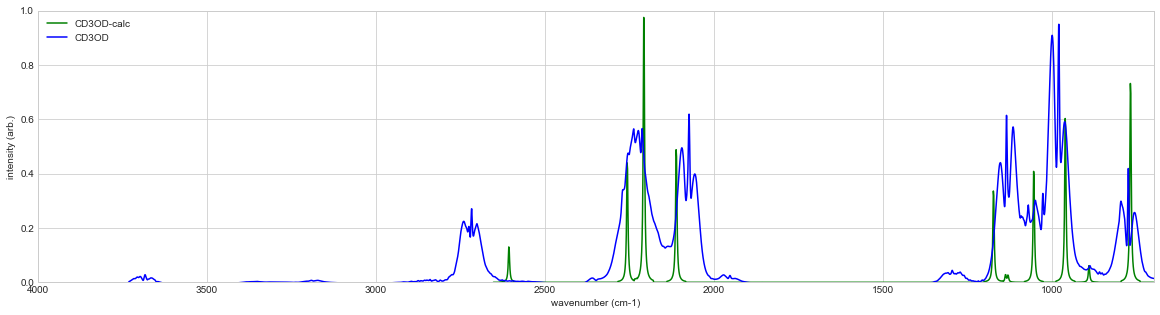

In [57]:
plt.figure(figsize=[20,5])

plt.plot(0.925*x6,y6/200,"g-",label="CD3OD-calc") 
plt.plot(x3,y3,"b-",label="CD3OD")

plt.xlabel('wavenumber (cm-1)')
plt.xlim(4000,700)
plt.ylim(0,1)
plt.ylabel('intensity (arb.)')
plt.legend()
plt.show()

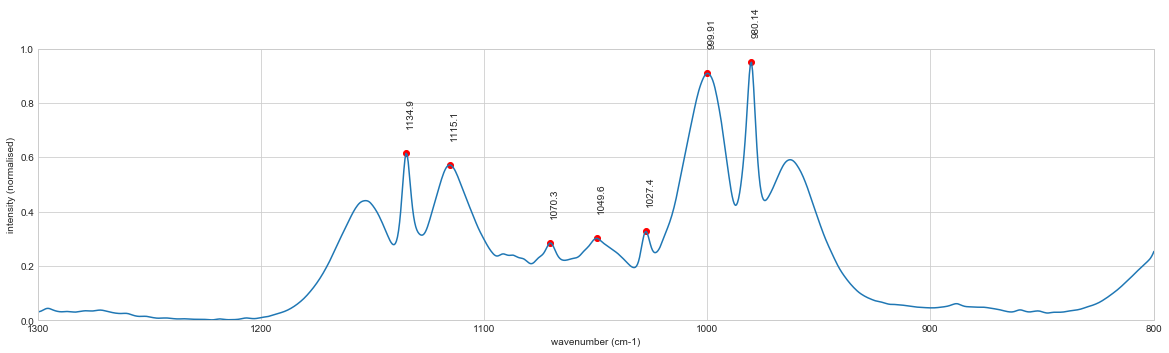

In [62]:
import scipy.signal as sig

peaks = sig.find_peaks(y3, threshold=None, distance=40, width=None, height=0.25)

xmin = 800
xmax = 1300

plt.figure(figsize=[20,5])
plt.plot(x3[peaks[0]],y3[peaks[0]],"ro")
plt.plot(x3,y3)
plt.xlabel('wavenumber (cm-1)')
plt.xlim(xmax,xmin)
plt.ylim(0,1)
plt.ylabel('intensity (normalised)')

for i in range(len(peaks[0])):
    if x3[peaks[0][i]] > xmin and x1[peaks[0][i]] < xmax:
        stri = '%s' % float('%.5g' % x3[peaks[0][i]])
        plt.text(x3[peaks[0][i]],y3[peaks[0][i]]+0.1,stri,rotation=90)

plt.show()

In [70]:
frequencies = [2716.7, 2212.4, 2073.6, 1134.9, 980.1, 774.8]
descriptions = ['OD str', 'CD str (a)', 'CD str (s)', 'DCD bend', 'CO str', 'COD bend']
cd3od_table = pd.DataFrame()
cd3od_table['Frequency /cm-1'] = frequencies
cd3od_table["Description"] = descriptions
cd3od_table

,Frequency /cm-1,Description
0,2716.7,OD str
1,2212.4,CD str (a)
2,2073.6,CD str (s)
3,1134.9,DCD bend
4,980.1,CO str
5,774.8,COD bend
